## Load Neccessary Libraries

In [13]:
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
from os.path import basename

## Load the web page


In [2]:
r= requests.get('https://keithgalli.github.io/web-scraping/webpage.html')
soup = bs(r.content)
print(soup.prettify())

<head>
 <title>
  Keith Galli's Page
 </title>
 <style>
  table {
    border-collapse: collapse;
  }
  th {
    padding:5px;
  }
  td {
    border: 1px solid #ddd;
    padding: 5px;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  th {
    padding-top: 12px;
    padding-bottom: 12px;
    text-align: left;
    background-color: #add8e6;
    color: black;
  }
  .block {
  width: 100px;
  /*float: left;*/
    display: inline-block;
    zoom: 1;
  }
  .column {
  float: left;
  height: 200px;
  /*width: 33.33%;*/
  padding: 5px;
  }

  .row::after {
    content: "";
    clear: both;
    display: table;
  }
 </style>
</head>
<body>
 <h1>
  Welcome to my page!
 </h1>
 <img src="./images/selfie1.jpg" width="300px"/>
 <h2>
  About me
 </h2>
 <p>
  Hi, my name is Keith and I am a YouTuber who focuses on content related to programming, data science, and machine learning!
 </p>
 <p>
  Here is a link to my channel:
  <a href="https://www.youtube.com/kgmit">
   youtube.com/kgmit
  </

## EXERCISE I: Grab all of the social links from the web page
#### Do this in at least 3 different ways (find, find_all and the select method)

##### Method 1


In [3]:
social_list = soup.find(attrs={'class':'socials'})
social_list_items = social_list.find_all('li')

for item in social_list_items:
    print(item.a['href'])

https://www.instagram.com/keithgalli/
https://twitter.com/keithgalli
https://www.linkedin.com/in/keithgalli/
https://www.tiktok.com/@keithgalli


##### Method 2

In [4]:
social_list = soup.select('.socials')
social_list_items = social_list[0].select('.social')
social_list_items

for social_list_item in social_list_items:
    print(social_list_item.select('a')[0]['href'])

https://www.instagram.com/keithgalli/
https://twitter.com/keithgalli
https://www.linkedin.com/in/keithgalli/
https://www.tiktok.com/@keithgalli


##### Method 3

In [5]:
# links = soup.body.find_all('ul')[1].find_all('a')
# i=0
# while i < len(links):
#     print(links[i]['href'])
#     i+=1

# print('FOURTH METHOD!')
# links = soup.select('a')

# for link in links:
#     if 'keithgalli' in link['href']:
#         print(link['href'])

social_links = soup.body.find_all(attrs={'class': 'social'})
links = [link.a['href'] for link in social_links]
links

['https://www.instagram.com/keithgalli/',
 'https://twitter.com/keithgalli',
 'https://www.linkedin.com/in/keithgalli/',
 'https://www.tiktok.com/@keithgalli']

## EXERCISE II: Scrap the Table
##### Well i tried to convert the table data to a csv file

<BarContainer object of 5 artists>

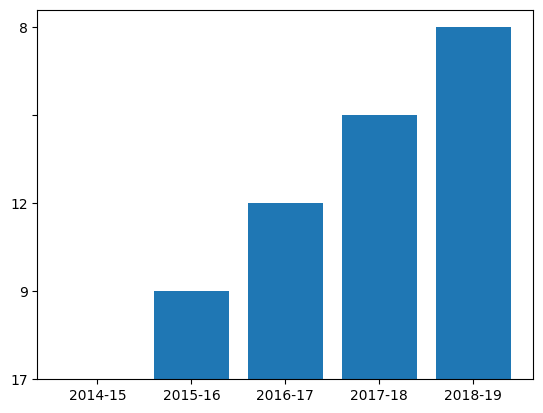

In [4]:
head = soup.find_all('th')
head_str = [h.string for h in head]
head_str[9] = 'seperator'
# dataset = np.array([head_str])
table_row = soup.find('tbody').find_all('tr')
# row_contents = table_row[1].select('td')

# In the function below, instead of replacing using regex, we can easily convert it to a str and then strip the string
# def get_inner_text(list):
#     arr = []
#     for item in list:
#         if item.string is None:
#             if '\n' in item.get_text():
#                 arr.append(re.sub('\n', '', item.get_text()).strip())
#             else:
#                 arr.append(item.get_text().strip())
#         else:
#             if '\n' in item.string:
#                 arr.append(re.sub('\n', '', item.string).strip())
#             else:
#                 arr.append(item.string.strip())
#     return arr
    
# row_content_texts = get_inner_text(row_contents)
# dataset = np.append(dataset, [row_content_texts], axis=0)
# for row in table_row[1:]:
#     dataset = np.append(dataset[1::], [get_inner_text(row.select('td'))], axis=0)
# df = pd.DataFrame(data=dataset)
dataset = []

for tr in table_row:
    td = tr.find_all('td')
    row = [str(tr.get_text()).strip() for tr in td]
    dataset.append(row)
# dataset
df = pd.DataFrame(data=dataset, columns=head_str)
df.to_csv('mit.csv', index=False)

plt.bar(df.iloc[:, 0], df.iloc[:,3])

## EXERCISE III: Grab all the fun facts with the word 'in' innit

In [94]:
soup.ul
all_li = soup.select('ul.fun-facts li')
with_is = [li.get_text() for li in all_li if 'is' in str(li.get_text())]
with_is

['Middle name is Ronald',
 'Dunkin Donuts coffee is better than Starbucks',
 "A favorite book series of mine is Ender's Game",
 'Current video game of choice is Rocket League',
 "The band that I've seen the most times live is the Zac Brown Band"]

## EXERCISE IV: Grab an Image from our soup and download it

In [74]:
url = 'https://keithgalli.github.io/web-scraping/'
src = url + soup.select('img')[1]['src']
if (not os.path.exists('images')):
    os.mkdir('images')
with open('images/' + basename(src), 'wb') as f:
    f.write(requests.get(src).content)
print(src)

https://keithgalli.github.io/web-scraping/images/italy/lake_como.jpg


In [93]:
all_secretmsg_ele = soup.select('div.block ul a')
all_msg_links = [url + secretmsg['href'] for secretmsg in all_secretmsg_ele]
all_messages = []
for msg_link in all_msg_links:
    r = requests.get(msg_link)
    webpage = bs(r.content)
    secret_word = webpage.body.find(attrs={'id': 'secret-word'}).string
    all_messages.append(secret_word)
print('\n'.join(all_messages))

Make
sure
to
smash
that
like
button
and
subscribe
!!!
